In [2]:
# Please include your imports in this cell
import numpy as np
#import keras
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD ##needs to be changed to keras

from scikeras.wrappers import KerasClassifier

# import imblearn
import sklearn
from  sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

In [4]:
X_train_n =  X_train/255.0
X_test_n = X_test/255.0

num_classes = 8
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

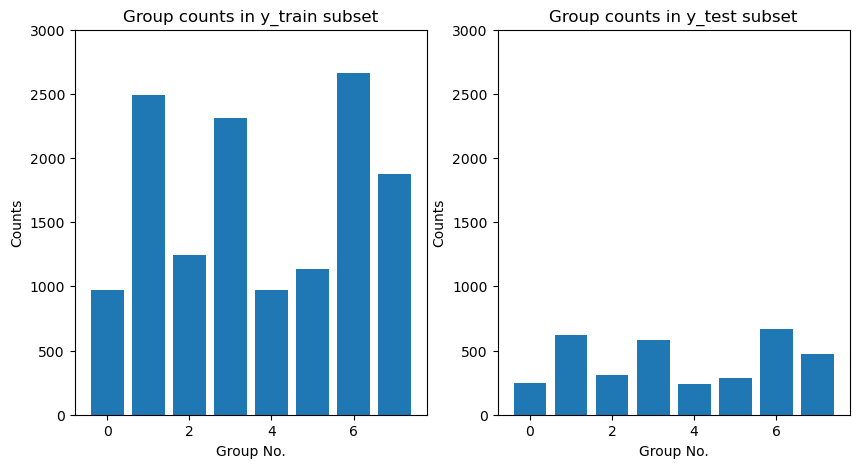

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_train, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

In [7]:
Counter(y_train)

Counter({6: 2663, 1: 2494, 3: 2316, 7: 1878, 2: 1241, 5: 1136, 0: 974, 4: 971})

In [23]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


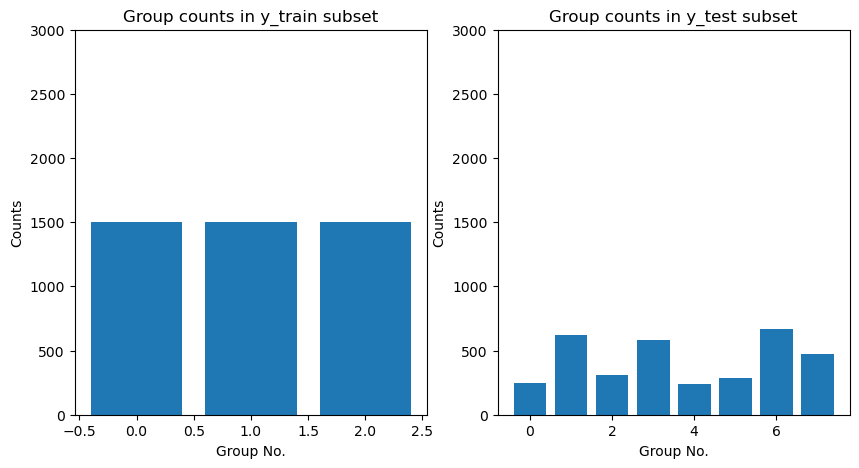

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_downsampled, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
Counter(y)

Counter({0: 9900, 1: 100})

In [11]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

ValueError: Found array with dim 4. None expected <= 2.

In [19]:
class_1 = X_train[y_train==0]
len(class_1)

974

In [ ]:
##Random forest ensemble method
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model.fit(x_train2,y_train)

In [5]:
X_train_r =  np.reshape(X_train, (X_train.shape[0], -1))
X_test_r = np.reshape(X_test, (X_test.shape[0], -1))

X_train_r_n =  X_train_r/255.0
X_test_r_n = X_test_r/255.0

In [28]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
mlp = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(32,), (32,16,), (128,32,16,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' :[10,20,30],
    'batch_size' :[32,64,128]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_r_n, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warning

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'batch_size': 64, 'hidden_layer_sizes': (128, 32, 16), 'learning_rate': 'adaptive', 'max_iter': 30, 'solver': 'adam'}
0.701 (+/-0.045) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'max_iter': 10, 'solver': 'adam'}
0.740 (+/-0.081) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'max_iter': 20, 'solver': 'adam'}
0.757 (+/-0.063) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'max_iter': 30, 'solver': 'adam'}
0.698 (+/-0.195) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'max_iter': 10, 'solver': 'adam'}
0.760 (+/-0.020) for {'activation': 'relu', 'alpha': 0.05, 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'max_iter

In [34]:
def create_MLPmodel(neurons, dropout_rate, activation,):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 3]))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics= ['accuracy'])

    return model

model_mlp = create_MLPmodel(256, 0.05, 'relu')
history = model_mlp.fit(X_train_n, y_train_c, batch_size = 32, epochs = 50, validation_data =  (X_test_n, y_test_c), shuffle = True)


Epoch 1/50
428/428 [==============================] - 1s 2ms/step - loss: 1.3332 - accuracy: 0.4876 - val_loss: 0.9461 - val_accuracy: 0.6517
Epoch 2/50
428/428 [==============================] - 1s 2ms/step - loss: 0.9239 - accuracy: 0.6487 - val_loss: 0.8186 - val_accuracy: 0.6996
Epoch 3/50
428/428 [==============================] - 1s 2ms/step - loss: 0.8396 - accuracy: 0.6812 - val_loss: 0.7796 - val_accuracy: 0.7087
Epoch 4/50
428/428 [==============================] - 1s 2ms/step - loss: 0.7852 - accuracy: 0.7032 - val_loss: 0.7034 - val_accuracy: 0.7406
Epoch 5/50
428/428 [==============================] - 1s 2ms/step - loss: 0.7435 - accuracy: 0.7257 - val_loss: 0.7492 - val_accuracy: 0.7169
Epoch 6/50
428/428 [==============================] - 1s 3ms/step - loss: 0.7193 - accuracy: 0.7356 - val_loss: 0.8066 - val_accuracy: 0.6984
Epoch 7/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.7431 - val_loss: 0.5766 - val_accuracy: 0.7830
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


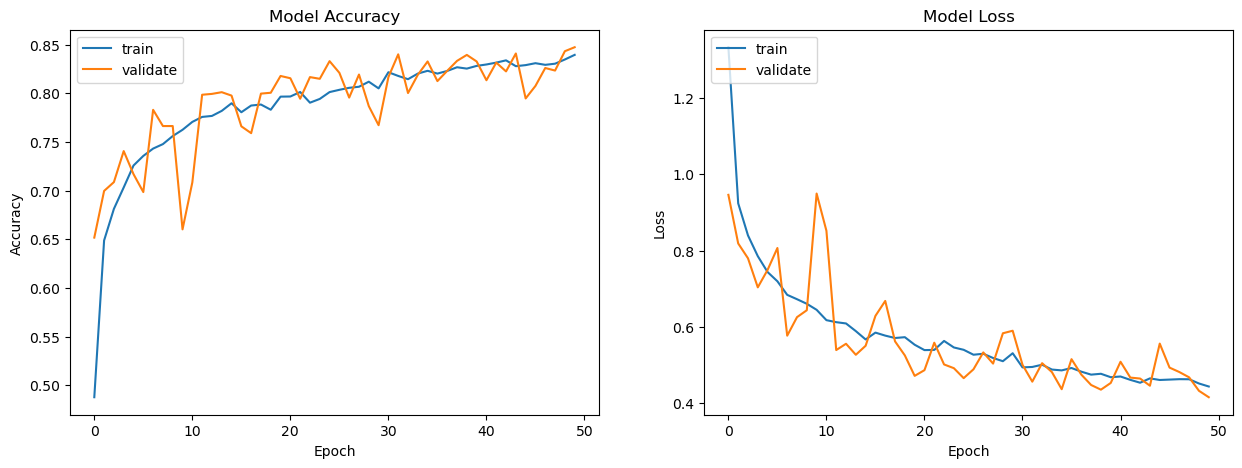

In [35]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [36]:
y_pred = model_mlp.predict(X_test_n)
Y_Pred = np.argmax(y_pred, axis=1)
Y_True = np.argmax(y_test_c, axis=1)
print(classification_report(Y_True, Y_Pred))


107/107 [==============================] - 0s 799us/step
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       244
           1       0.96      0.94      0.95       623
           2       0.90      0.88      0.89       310
           3       0.65      0.77      0.71       579
           4       0.89      0.70      0.78       243
           5       0.67      0.75      0.71       284
           6       0.91      0.92      0.91       666
           7       0.99      0.99      0.99       470

    accuracy                           0.85      3419
   macro avg       0.84      0.81      0.82      3419
weighted avg       0.85      0.85      0.85      3419



In [37]:
Y_Pred[2]

3

In [38]:
cm = confusion_matrix(y_pred,y_test_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

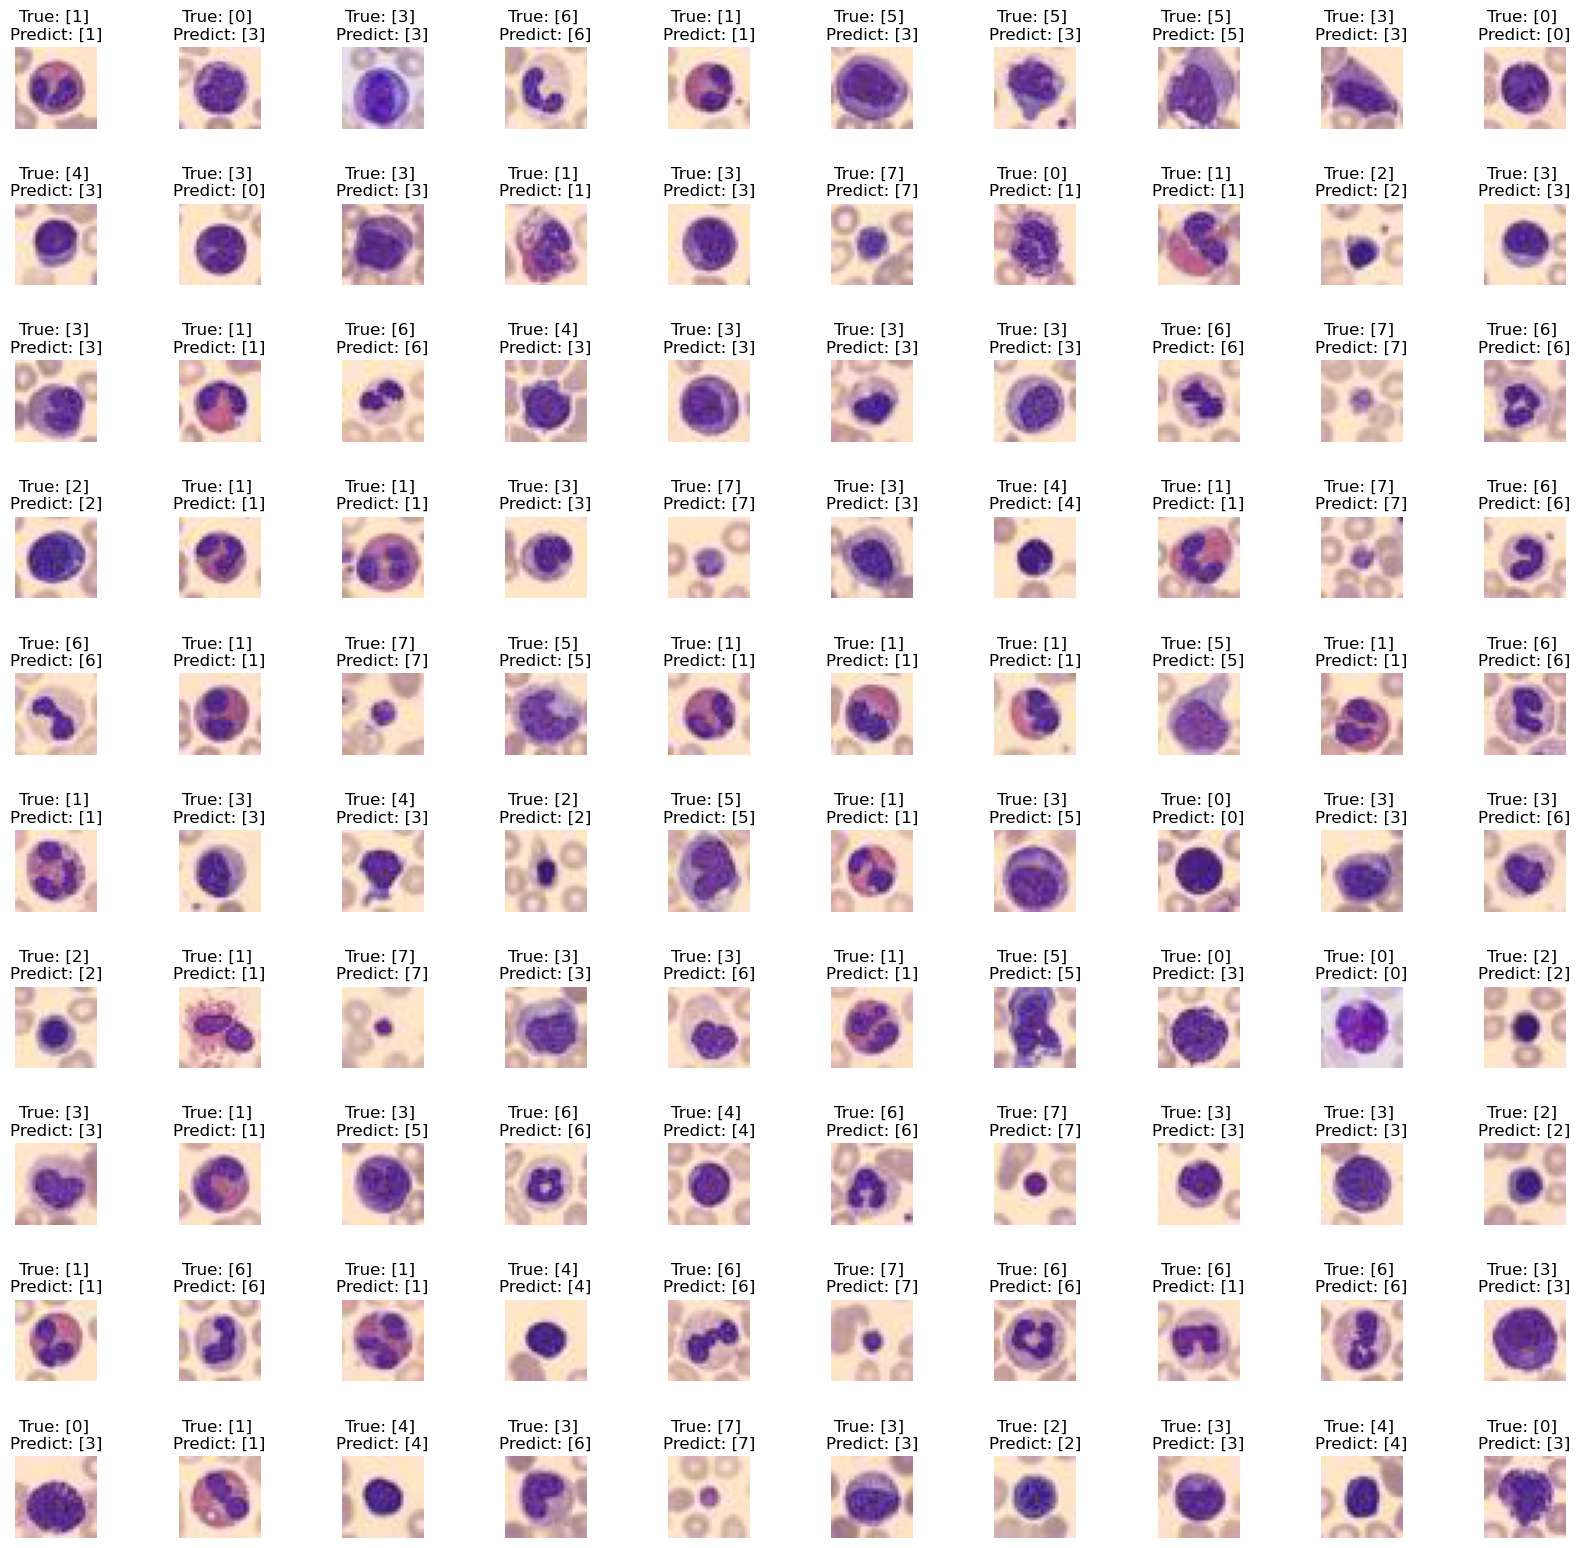

In [39]:
R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_True[i]], [Y_Pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [41]:
def create_ConVmodel(activation):
    model = Sequential()
        # Layer 1: Convolutional layer with 64 filters
    model.add(Conv2D(64, (3, 3), padding='same',input_shape=X_train_n.shape[1:],activation=activation))
    model.add(BatchNormalization())

        # Layer 2: Convolutional layer with 64 filters
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

        # Layer 3: Convolutional layer with 128 filters
    model.add(Conv2D(128, (3, 3), padding='same', activation=activation))
    model.add(BatchNormalization())

        # Layer 4: Convolutional layer with 128 filters
    model.add(Conv2D(128, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    # Layer 5: Fully connected layer with 512 units and L2 regularizatio
    model.add(Dense(512,kernel_regularizer=l2(0.01), activation=activation))
    model.add(Dropout(0.5))
        # Output layer: Fully connected layer with num_classes units for classification
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['categorical_accuracy'])
    return model

model_conv = create_ConVmodel('relu')
history = model_conv.fit(X_train_n, y_train_c, batch_size = 32, epochs = 50, validation_data = (X_test_n, y_test_c), shuffle = True)



Epoch 1/50
158/428 [==========>...................] - ETA: 17s - loss: 6.9513 - categorical_accuracy: 0.6798

KeyboardInterrupt: 

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
y_pred = model_mlp.predict(X_test_n)
Y_Pred = np.argmax(y_pred, axis=1)
Y_True = np.argmax(y_test_c, axis=1)
print(classification_report(Y_True, Y_Pred))

In [ ]:
R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_True[i]], [Y_Pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)R = 10
C = 10
fig, axes = plt.subplots(R, C, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % ([Y_True[i]], [Y_Pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [1]:
print("hello")

hello
